# 분류 (Classification)

-----

### 앙상블 (Ensemble Method)

#### - 배깅(Bagging)

배깅은 주어진 데이터에 대해서 여러개의 부트스트랩 자료를 생성하고, 각 부트스트랩 자료를 모델링한 후 결합하여 최종의 예측 모형을 산출하는 방법이다.

부트스트랩 : 단순복원 임의추출(Random sampling)을 통해 표본 자료를 생성하는 방법

배깅은 예측 모형의 변동성이 큰 경우 예측모형의 변동성을 감소시키기 위해 사용한다.

따라서 배깅은 일반적으로 과대 적합 된 모형, 편의가 작고 분산이 큰 모형에 사용하는 것이 적합하다.

![bagging](./bagging.png)



대표적인 방법 : 랜덤포레스트

-----

#### - 부스팅(Boosting)

부스팅은 잘못 분류된 개체들에 가중치를 부여하여 데이터를 선택한다.

즉, 잘못 분류된 개체들에 집중하여 새로운 분류규칙을 만드는 단계를 반복한다.

약한 예측모형을 결합하여 강한 예측 모형을 만드는 알고리즘이다.

![boosting](./boosting_way.png)


대표적인 방법 : XgBoost, LightGBM, Gradient Boosting

## 결정 트리 (Decision Tree)

데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것.

규칙이 많을 수록, 분류를 결정하는 방식이 복잡해짐 -> 과적합 발생이 쉬움

즉, 트리의 깊이가 깊을수록 결정 트리의 예측 성능이 저하될 가능성이 높다.

---
- 정보이득 = (1- 엔트로피)  높을수록 좋음,       엔트로피 : 주어진 데이터 집합의 혼잡도
- 지니 : 데이터의 평등함을 평가하는 척도, 데이터가 다양한 값을 가질 수록 좋음(0), 나쁨(1)

디폴트 : 지니계수

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=0)

# 붓꽃 데이터 로딩, 학습/테스트 데이터 분리
iris_data=load_iris()

train=iris_data.data
target=iris_data.target

x_train, x_test, y_train, y_test=train_test_split(train, target, test_size=0.2, random_state=11)

In [3]:
# 결정 트리 분류기 학습

dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Feature importanes:
[0.    0.025 0.049 0.926]
sepal length (cm) : 0.000
sepal width (cm) : 0.025
petal length (cm) : 0.049
petal width (cm) : 0.926


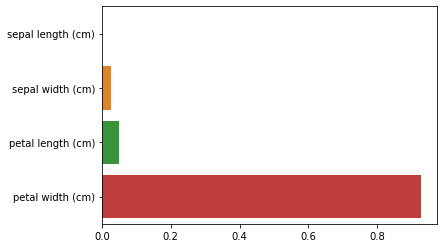

In [13]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importanes:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
# feature importance를 column 별로 시각화 하기

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 결정 트리 과적합 (Overfitting)

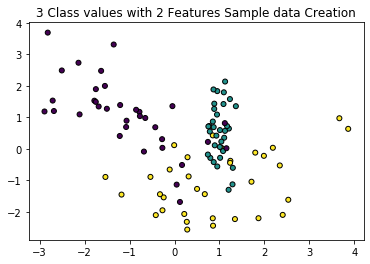

In [18]:
# 임의의 분류를 위한 테스트용 데이터 생성

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

# 2차원 시각화를 위해서 피쳐는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
x_features, y_labels=make_classification(n_features=2, n_redundant=0, n_informative=2,
                                        n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(x_features[:,0], x_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')
plt.title('3 Class values with 2 Features Sample data Creation')
plt.show()

In [19]:
# Classifier의 Decision Boundary를 시각화 하는 함수

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

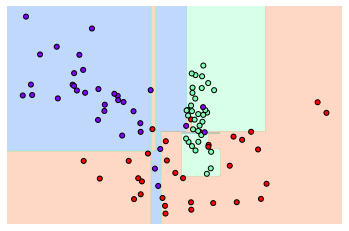

In [20]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf=DecisionTreeClassifier().fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

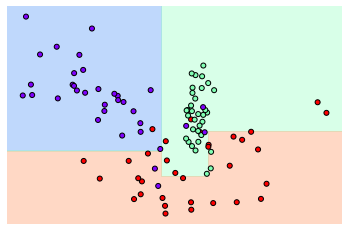

In [22]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 결정 경계 시각화

dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

트리 생성에 조건을 부과하여, 이상치에 크게 반응하지 않도록 분류가 되었다.